In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define variables
river_vel = 3 # Maximum river flow speed (m/s)
runner_diameter = 1.2 # Diameter of runner (m)
r_drum = 0.2 # Radius of drum (m)
L = 0.6 # Width of blade (m)
H = (runner_diameter/2) - r_drum # Length of blade from drum to tip (m)
A = L*H*2 # Area of two blades in contact with water (m^2)
D = r_drum + H/2 # Distacne from drum to center of blade (m)

print('H = ', round(H, 2))
print('A = ', round(A, 2))
print('D = ', round(D, 2))

# Define constants
rho = 1000 # Density of fresh water (kg/m^3)
RPM = 20 # Rotations per minute
CD = 1.28 # Drag coefficient

# Calculate relative velocity (at the root of the blade):
angular_vel = RPM * 2 * np.pi / 60 # Angular velocity (rad/s)
blade_vel = angular_vel * r_drum # Blade velocity (m/s)
rel_vel = river_vel - blade_vel # Relative velocity (m/s)

# Calulate torque
T = 0.5 * rho * rel_vel**2 * A * CD * D
print('T = ', round(T, 2))

H =  0.4
A =  0.48
D =  0.4
T =  818.65


H =  0.4
A =  0.48
D =  0.4
H =  0.4
A =  0.48
D =  0.4
H =  0.4
A =  0.48
D =  0.4


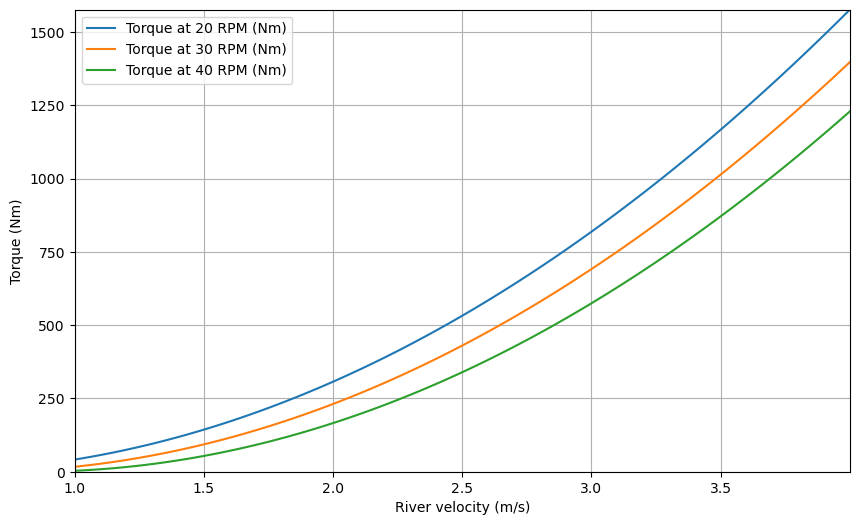

In [6]:
def torque(river_vel, runner_diameter, r_drum, L, RPM):
    # Define variables
    H = (runner_diameter/2) - r_drum # Length of blade from drum to tip (m)
    A = L*H*2 # Area of two blades in contact with water (m^2)
    D = r_drum + H/2 # Distacne from drum to center of blade (m)

    print('H = ', round(H, 2))
    print('A = ', round(A, 2))
    print('D = ', round(D, 2))

    # Define constants
    rho = 1000 # Density of fresh water (kg/m^3)
    CD = 1.28 # Drag coefficient

    # Calculate relative velocity (at the root of the blade):
    angular_vel = RPM * 2 * np.pi / 60 # Angular velocity (rad/s)
    blade_vel = angular_vel * r_drum # Blade velocity (m/s)
    rel_vel = river_vel - blade_vel # Relative velocity (m/s)

    T = 0.5 * rho * rel_vel**2 * A * CD * D
    return T

# Plot torque vs. river velocity
river_vel = np.linspace(1, 4, 100)
Torques_20 = torque(river_vel, runner_diameter, r_drum, L, 20)
Torques_30 = torque(river_vel, runner_diameter, r_drum, L, 30)
Torques_40 = torque(river_vel, runner_diameter, r_drum, L, 40)


# Define x and y ticks
x_ticks = np.arange(0, max(river_vel), 0.5)
y_ticks = np.arange(0, max(Torques_20), 250)

# Plot h vs velocity
plt.figure(figsize=(10, 6))
plt.plot(river_vel, Torques_20, label='Torque at 20 RPM (Nm)')
plt.plot(river_vel, Torques_30, label='Torque at 30 RPM (Nm)')
plt.plot(river_vel, Torques_40, label='Torque at 40 RPM (Nm)')
plt.xlabel('River velocity (m/s)')
plt.ylabel('Torque (Nm)')
plt.legend()
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(True)
plt.xlim(min(river_vel), max(river_vel))
plt.ylim(0, max(Torques_20))
plt.show()